In [1]:
#from matplotlib import rc
#rc('font',**{'family':'san-serif','sans-serif':['Helvetica']})
#rc('text',usetex=True)

In [2]:
def roller_coaster_Newton(state,t,geometry,g):
    #unpack the state
    x     = state[0]
    y     = state[1]
    vx    = state[2]
    vy    = state[3]
    
    #evaluate the geometry
    f,df,df2 = geometry(x)
    tau      = 1.0/(1.0+df**2)
    
    #return the derivative
    return np.array([vx,vy,-g*tau*df,-g*tau*df**2])

In [3]:
def roller_coaster_old(state,t,geometry,g):
    #unpack the state
    x      = state[0]
    y      = state[1]
    vx     = state[2]
    vy     = state[3]
    
    #evaluate the geometry
    f,df,df2   = geometry(x)
    denom      = np.sqrt(1+df**2)
    
    #construct the  
    Fg     = np.array([0,-g])
    N      = np.array([-df,1])/denom
    FN     = -Fg.dot(N)*N
    F      = Fg + FN
    
    return np.array([vx,vy,F[0],F[1]])

In [4]:
def roller_coaster_Lagrange(state,t,geometry,g):
    #unpack the state
    x  = state[0]
    vx = state[1]
    
    #evaluate the geometry
    f,df,df2 = geometry(x)
    tau      = 1.0/(1.0+df**2)
    
    return np.array([vx,-df*tau*(g+df2*vx**2)])

In [5]:
def create_full_eph(eph,geometry):
    x          = eph[:,0]
    vx         = eph[:,1]
    y, df, df2 = geometry(x)
    vy         = df*vx
    
    return np.vstack((x,y,vx,vy)).T

In [6]:
def calculate_energy(eph):
    x  = eph[:,0]
    y  = eph[:,1]
    vx = eph[:,2]
    vy = eph[:,3]
    K = 0.5*(vx**2 + vy**2)
    U = g*y
    E = K + U
    
    return E

In [7]:
def plane(x):
    return x, 1, 0

In [8]:
def parabola(x):
    return x**2, 2*x, 2

In [9]:
def cubic(x):
    return x**3, 3*x**2, 6*x

In [10]:
g         = 9.8
geometry  = parabola
S0        = np.array([2,2**2,0,0])
T0        = np.array([2,0])
time_span = np.arange(0,4,0.01)
eph_new   = sp.integrate.odeint(roller_coaster_Newton,S0,time_span,args=(geometry,g))
eph_ultra = sp.integrate.odeint(roller_coaster_Lagrange,T0,time_span,args=(geometry,g))

In [11]:
plt.rc('text',usetex=True)

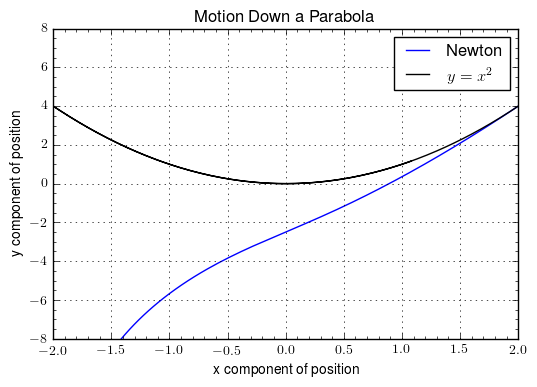

In [18]:
plt.plot(eph_new[:,0],eph_new[:,1],label='Newton')
plt.plot(eph_new[:,0],eph_new[:,0]**2,'k-',label=r'$y=x^2$')
plt.title('Motion Down a Parabola')
plt.xlabel('x component of position')
plt.ylabel('y component of position')
plt.grid('on')
plt.xlim([-2,2])
plt.ylim([-8,8])
plt.minorticks_on()
plt.figaspect(1.0)
plt.legend()

array([ 4.,  4.])

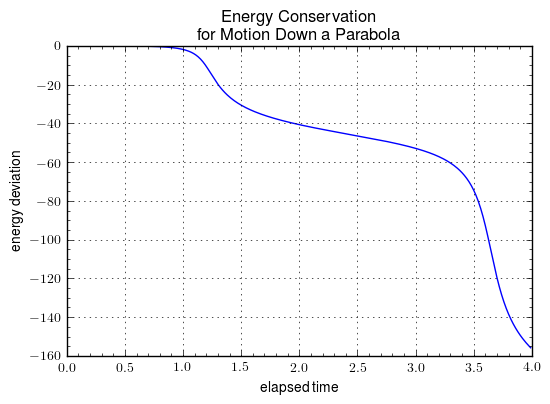

In [15]:
E = calculate_energy(eph_new)
plt.plot(time_span,E-E[0],'b-')
#plt.ylim([19.5,19.7])
plt.title('Energy Conservation \n for Motion Down a Parabola')
plt.xlabel('elapsed time')
plt.ylabel('energy deviation')
plt.grid('on')
plt.minorticks_on()
plt.figaspect(1.0)

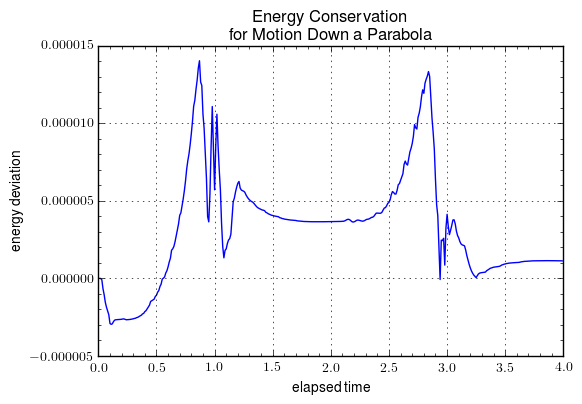

In [16]:
eph_ultranew = create_full_eph(eph_ultra,parabola)
E_new        = calculate_energy(eph_ultranew)
plt.plot(time_span,E_new-E_new[0])
plt.grid('on')
plt.minorticks_on()
plt.figaspect(1.0)
plt.title('Energy Conservation \n for Motion Down a Parabola')
plt.xlabel('elapsed time')
plt.ylabel('energy deviation')

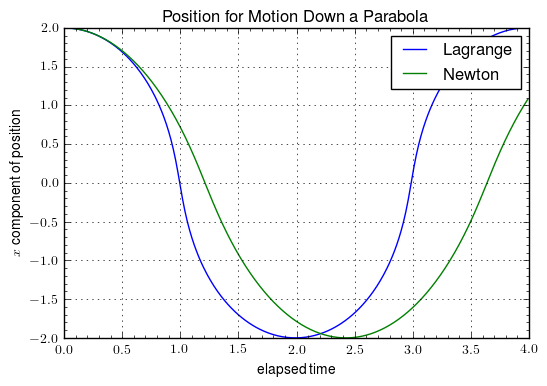

In [17]:
plt.plot(time_span,eph_ultra[:,0],label='Lagrange')
plt.plot(time_span,eph_new[:,0],label='Newton')
plt.legend()
plt.grid('on')
plt.minorticks_on()
plt.figaspect(1.0)
plt.title(r'Position for Motion Down a Parabola')
plt.xlabel(r'elapsed time')
plt.ylabel(r'$x$ component of position')

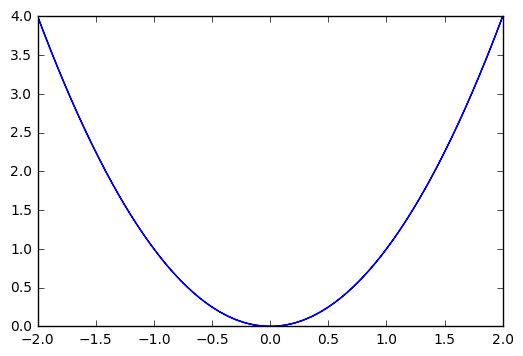

In [14]:
plt.plot(eph_ultranew[:,0],eph_ultranew[:,1])